# Sprint14課題 ディープラーニングフレームワーク1


TensorFlowを触ってみる

In [2]:
import tensorflow as tf

a = tf.constant(5)
b = tf.constant(7)
add = tf.add(a, b)

In [3]:
sess = tf.Session()
output = sess.run(add)
print(output)
sess.close

12


<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x1120c2198>>

In [6]:
#こっちでも良い
with tf.Session() as sess:
        output = sess.run(add)
        print(output)

12


In [7]:
#NumPyでも同じ計算
import numpy as np
a_n = np.array(5)
b_n = np.array(7)
output_n = np.add(a_n, b_n)
print(output_n)

12


データフロープログラミング

In [10]:
a = tf.constant(5)
b = tf.constant(7)
add = tf.add(a, b)

#numpyであれば上記で計算まで行われるがTensorFlowでは進まない

print(a)
print(b)
print(add)

Tensor("Const_8:0", shape=(), dtype=int32)
Tensor("Const_9:0", shape=(), dtype=int32)
Tensor("Add_4:0", shape=(), dtype=int32)


In [34]:
#placeholder (data flow graph構築時には値が決まっていない)
#variable (data flow graph構築時に値が決まっていて、変更もできる)
#constant (data flow graph構築時に値が決まっていて、変更できない)

#placeholderの使い方
c = tf.placeholder(tf.int32)
d = tf.placeholder(tf.int32)
add = tf.add(c, d)

sess = tf.Session()
output = sess.run(add, feed_dict={c:5, d:7})
sess.close
print(output)

12


In [35]:
sess = tf.Session()
output = sess.run(add, feed_dict={c:20, d:32})
sess.close
print(output)

52


In [30]:
a = tf.constant(5)
b = tf.constant(7)
add = a + b

with tf.Session() as sess:
        output_n = sess.run(add)
        print(output_n)

12


ロジスティック回帰の実装

Logic Circuit

|Input1|Input2|Output|
|---|---|---|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

In [48]:
#generate data
import numpy as np
x_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_train = np.array([
    [0], [0], [0], [1]
])


In [55]:
#データフローグラフの構築
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 2])
t = tf.placeholder(tf.float32, [None, 1])

#重みとバイアスのvaliableを用意
W= tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

#logistic regressionの仮定関数と目的関数
y = tf.sigmoid(tf.matmul(x, W) + b)
cross_entropy = tf.reduce_sum(-t * tf.log(y) - (1 - t) * tf.log(1-y))

#parameter optimization
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

#正解かどうか判定
#tf.signで正負判定して1(positive), 0(zero), -1(negative)を返却
#tf.equalで等しいか判定
correct_prediction = tf.equal(tf.sign(y - 0.5), tf.sign(t - 0.5))

#正解率
#tf.reduce_mean()で多次元配列の各成分の平均を計算
#tf.castでboolを0, 1に変換
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#セッションを準備してパラメータを最適化させる計算をする
with tf.Session() as sess:
        #tf.global_variables_initializer() でW, bを初期化
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(1000):
                sess.run(train_step, feed_dict={x:x_train, t:y_train})
                #100 loop毎にaccuracyを表示
                if epoch % 100 == 0:
                        acc_val = sess.run(accuracy, feed_dict={x:x_train, t:y_train})
                        print("epoch: %d, Accuracy: %.3f" % (epoch, acc_val))
        #学習結果が正しいか確認
        classified = sess.run(correct_prediction, feed_dict={x:x_train,t:y_train})
        #出力yの確認
        prob = sess.run(y, feed_dict={x:x_train, t:y_train})
        
        print(classified)
        print(prob)
        print("W: ", sess.run(W))
        print("b: ", sess.run(b))

epoch: 0, Accuracy: 0.750
epoch: 100, Accuracy: 1.000
epoch: 200, Accuracy: 1.000
epoch: 300, Accuracy: 1.000
epoch: 400, Accuracy: 1.000
epoch: 500, Accuracy: 1.000
epoch: 600, Accuracy: 1.000
epoch: 700, Accuracy: 1.000
epoch: 800, Accuracy: 1.000
epoch: 900, Accuracy: 1.000
[[ True]
 [ True]
 [ True]
 [ True]]
[[1.9651403e-04]
 [4.9049813e-02]
 [4.9049813e-02]
 [9.3120378e-01]]
W:  [[5.569955]
 [5.569955]]
b:  [-8.53458]


## 【問題1】スクラッチを振り返る
ここまでのスクラッチを振り返り、ディープラーニングを実装するためにはどのようなものが必要だったかを列挙してください。
それらがフレームワークにおいてはどのように実装されるかを今回覚えていきましょう。

* 重みを初期化する必要があった
* エポックのループが必要だった
* forward propagationとback propagationが必要だった。
* activatorで次のLayerに渡す特徴量を活性化する必要があった。
* optimizerでパラメータの更新が必要だった。


## 【問題2】スクラッチとTensorFlowの対応を考える
以下のサンプルコードを見て、先ほど列挙した「ディープラーニングを実装するために必要なもの」がTensorFlowではどう実装されているかを確認してください。

それを簡単に言葉でまとめてください。単純な一対一の対応であるとは限りません。

* 重みの初期化はtf.random_normalで実施。
* エポックのループはtensorflowではなく、for文でepoch数だけ回す
* backward propagationはコーディング上意識する必要はなく、layerにA=XW+Bを代入して活性化関数を当てるforward側の流れのみを書けば良い。
* activatorは「tf.nn.relu(A)」などで引数Aに値を渡せばで良い。
* optimizerは「tf.train.Optimizer名」でインスタンスを作り、「optimizer.minimize(cost_function)」で最適化をする

## 【問題3】3種類全ての目的変数を使用したIrisのモデルを作成

In [1]:
#get mini batchをimport
import sys

dir_str = "../../ml-scratch/utils"
if dir_str not in sys.path:
        sys.path.append(dir_str)
        
from get_mini_batch import GetMiniBatch

In [2]:
import tensorflow as tf
def example_net(x, n_input, n_hidden1, n_hidden2, n_classes):
    """
    単純な3層ニューラルネットワーク
    """

    # 重みとバイアスの宣言
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }

    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] # tf.addと+は等価である
    
    return layer_output

In [3]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-setosa']=0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int)

#one hot encode
eye = np.eye(len(np.unique(y)))
y = eye[y]
print(y[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [9]:
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [10]:
#get mini batchをimport
import sys

dir_str = "../../ml-scratch/utils"
if dir_str not in sys.path:
        sys.path.append(dir_str)
        
from get_mini_batch import GetMiniBatch

Sigmoidのままやってみる

In [15]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10

n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = y_train.shape[1]

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# ネットワーク構造の読み込み                               
logits = example_net(x=X, n_input=n_input,
                     n_hidden1=n_hidden1, n_hidden2=n_hidden2, n_classes=n_classes)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits)
# 目的関数
loss_op = tf.reduce_mean(cross_entropy)
# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
#推定結果
pred = tf.sigmoid(logits)
# 推定結果が正しいか
correct_pred = tf.equal(tf.sign(Y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))
# 指標値計算
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# variableの初期化
init = tf.global_variables_initializer()

# 計算グラフの実行
with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
                # エポックごとにループ
                total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
                total_loss = 0
                total_acc = 0
                for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
                        # ミニバッチごとにループ
                        sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})

                        loss, acc = sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
                        print(sess.run(pred, feed_dict={X: mini_batch_x}))
                        #print(sess.run(correct_pred, feed_dict={X: mini_batch_x, Y: mini_batch_y}))

                        total_loss += loss
                        total_acc += acc
                total_loss /= n_samples
                total_acc /= n_samples
                val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
                print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}".format(epoch, loss, val_loss, acc, val_acc))
        test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
        print("test_acc : {:.3f}".format(test_acc))

Instructions for updating:
Colocations handled automatically by placer.
[[0.0000000e+00 1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.0000000e+00]
 [9.9999988e-01 1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.0000000e+00]
 [3.5452946e-11 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00]]
[[2.6994944e-04 9.9994934e-01 1.0000000e+00]
 [1.4016032e-04 9.9120671e-01 1.0000000e+00]
 [4.5499504e-03 9.9946213e-01 1.0000000e+00]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [3.4374952e-02 9.9999934e-01 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [9.4420682e-10 9.6970123e-12 1.0000000e+00]
 [1.1459473e-07 5.8915445e-10 1.0000000e+00]]
[[3.1238794e-03 0.0000000e

[[0.0000000e+00 0.0000000e+00 9.8256052e-01]
 [1.0000000e+00 3.5762787e-07 0.0000000e+00]
 [0.0000000e+00 9.9929065e-01 1.5795231e-05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 9.9999988e-01]
 [5.1325487e-20 1.0000000e+00 7.2999480e-19]
 [1.0000000e+00 3.5589195e-11 0.0000000e+00]]
[[0.00000000e+00 1.14738941e-05 1.10298395e-04]
 [1.00000000e+00 4.76837158e-07 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.91724432e-01 5.63263893e-06]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 5.96046448e-08 0.00000000e+00]
 [0.00000000e+00 2.92062759e-06 1.00000000e+00]
 [1.00000000e+00 1.36876472e-13 0.00000000e+00]
 [1.00000000e+00 1.55927007e-11 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.0

Softmaxでやってみる

In [18]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10

n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = y_train.shape[1]

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# ネットワーク構造の読み込み                               
logits = example_net(x=X, n_input=n_input,
                     n_hidden1=n_hidden1, n_hidden2=n_hidden2, n_classes=n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits)
# 目的関数
loss_op = tf.reduce_mean(cross_entropy)
# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
#推定結果(probability)
proba = tf.nn.softmax(logits)
#推定結果(label)
pred = tf.argmax(proba, axis=1)
# 推定結果が正しいか
correct_pred = tf.equal(tf.argmax(Y, axis=1), pred)
# 指標値計算
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# variableの初期化
init = tf.global_variables_initializer()

# 計算グラフの実行
with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
                # エポックごとにループ
                total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
                total_loss = 0
                total_acc = 0
                for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
                        # ミニバッチごとにループ
                        sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})

                        loss, acc = sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
                        print(sess.run(pred, feed_dict={X: mini_batch_x}))
                        #print(sess.run(correct_pred, feed_dict={X: mini_batch_x, Y: mini_batch_y}))

                        total_loss += loss
                        total_acc += acc
                total_loss /= n_samples
                total_acc /= n_samples
                val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
                print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}".format(epoch, loss, val_loss, acc, val_acc))
        test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
        print("test_acc : {:.3f}".format(test_acc))

[2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2]
[2 2 0 2 2 2 2 2 2 2]
[1 0 1 0 0 1 0 0 1 0]
[0 1 0 1 1 1 1 1 0 1]
[0 1 1 1 1 1 1 1 0 0]
[1 0 1 1 0 1 0 1 1 0]
[1 0 1 1 1 1 0 1 0 0]
[1 2 1 0 1 0 0 0 1 0]
[0 2 2 2 2 2]
Epoch 0, loss : 20.8562, val_loss : 12.2956, acc : 0.333, val_acc : 0.708
[2 2 2 2 2 2 0 2 2 0]
[2 2 2 0 0 2 0 2 2 2]
[2 2 0 2 2 2 2 2 2 2]
[2 0 2 0 0 2 0 0 2 0]
[0 2 0 2 2 2 2 2 0 2]
[0 2 1 1 2 1 2 2 0 0]
[1 0 1 1 0 1 0 1 1 0]
[1 0 1 1 1 1 0 1 0 0]
[1 1 1 0 1 0 0 0 1 0]
[0 2 1 1 1 1]
Epoch 1, loss : 0.1063, val_loss : 5.4166, acc : 1.000, val_acc : 0.667
[2 1 2 2 1 2 0 2 2 0]
[2 1 2 0 0 2 0 2 2 2]
[2 2 0 2 2 1 2 2 2 2]
[2 0 2 0 0 1 0 0 2 0]
[0 2 0 2 2 2 2 2 0 2]
[0 2 1 1 2 2 2 2 0 0]
[2 0 2 1 0 1 0 2 1 0]
[1 0 1 1 1 2 0 2 0 0]
[2 2 1 0 2 0 0 0 2 0]
[0 2 1 1 1 1]
Epoch 2, loss : 0.0000, val_loss : 1.5133, acc : 1.000, val_acc : 0.833
[2 1 2 2 1 2 0 1 2 0]
[1 1 1 0 0 2 1 2 2 1]
[1 2 0 2 1 1 1 1 2 1]
[1 0 1 0 0 1 0 0 2 0]
[0 1 0 1 2 2 2 2 0 2]
[0 2 1 1 2 1 2 2 0 0]
[2 0 2 1 0 1 0

Softmaxは各列の合計が1になるような計算のため、one-hot vectorの各列に対して最も確率が高いもののみ1となる。確率が(0.35, 0.12, 0.53)の場合、判定は(0, 0, 1)。対して、Sigmoidでも推定できた。Sigmoidの場合yの確率が0.5以上で1と判定されるが、one-hot vectorの各列に対して独立に扱っているため複数の列で1になりうるし、全ての列で0にもなりうる。学習が進むと結果的に1つの列でのみ1に落ち着く傾向にあるが、特に学習序盤だと複数のフラグが1になったり全ての列で0となっているることもあるとわかった。

## 【問題4】House Pricesのモデルを作成

In [19]:
import numpy as np
import pandas as pd

dataset_path = '../../../diveintocode-term1/sprint/sprint3/train.csv'
data = pd.read_csv(dataset_path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
X = data.loc[:, ["GrLivArea", "YearBuilt"]]
y = data.loc[:, ["SalePrice"]]
#pandas -> ndarray
X = np.array(X)
y = np.array(y)

#logとって歪度を修正
y = np.log(y)

from sklearn.model_selection import train_test_split
#split data (all -> train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#split data (train -> train, val)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


#y scaling (min: 0, max: 1)
from sklearn.preprocessing import MinMaxScaler
#generate instance
scaler_min_max = MinMaxScaler()

y_max = np.max(y)
y_min = np.min(y)
#fit with train
scaler_min_max.fit(y_train)
#transform train, val, test data with fitted scaler
y_train = scaler_min_max.transform(y_train)
y_val = scaler_min_max.transform(y_val)
y_test = scaler_min_max.transform(y_test)


#X scaling
from sklearn.preprocessing import StandardScaler
#generate instance
scaler = StandardScaler()

#fit with train
scaler.fit(X_train)
#transform train, val, test data with fitted scaler
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


"""
#scaling
from sklearn.preprocessing import StandardScaler
#generate instance
scaler = StandardScaler()

#fit with train
scaler.fit(X_train)
#transform train, val, test data with fitted scaler
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


#fit with train
scaler.fit(y_train)
#transform train, val, test data with fitted scaler
y_train = scaler.transform(y_train)
y_val = scaler.transform(y_val)
y_test = scaler.transform(y_test)
"""


'\n#scaling\nfrom sklearn.preprocessing import StandardScaler\n#generate instance\nscaler = StandardScaler()\n\n#fit with train\nscaler.fit(X_train)\n#transform train, val, test data with fitted scaler\nX_train = scaler.transform(X_train)\nX_val = scaler.transform(X_val)\nX_test = scaler.transform(X_test)\n\n\n#fit with train\nscaler.fit(y_train)\n#transform train, val, test data with fitted scaler\ny_train = scaler.transform(y_train)\ny_val = scaler.transform(y_val)\ny_test = scaler.transform(y_test)\n'

In [93]:
def reg_net(x, n_input, n_hidden1, n_hidden2, n_classes):
    """
    3層ニューラルネットワーク
    """

    # 重みとバイアスの宣言
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }

    layer_1 = tf.matmul(x, weights['w1']) + biases['b1']
    layer_1 = tf.nn.sigmoid(layer_1)
    layer_2 = tf.matmul(layer_1, weights['w2']) + biases['b2']
    layer_2 = tf.nn.sigmoid(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] # tf.addと+は等価である
    return layer_output

In [102]:
#hyper parameters
learning_rate = 0.001
batch_size = 10
n_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes= y_train.shape[1]

#計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

#trainのミニバッチイテレータ
mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

#network構造の読み込み
logits = reg_net(x=X, n_input=n_input,
                     n_hidden1=n_hidden1, n_hidden2=n_hidden2, n_classes=n_classes)

#prediction
pred = tf.nn.sigmoid(logits)

#目的関数
mse  = tf.reduce_mean(tf.square(pred - Y))

#最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

#最適化
train_op = optimizer.minimize(mse)

#variable初期化
init = tf.global_variables_initializer()

#計算グラフの実行
with tf.Session() as sess:
        sess.run(init)
        loss_log = {"training": [], "validation": []}
        for epoch in range(n_epochs):
                total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
                total_loss = 0
                for i, (mini_x, mini_y) in enumerate(mini_batch_train):
                        sess.run(train_op, feed_dict={X:mini_x, Y:mini_y})
                        loss = sess.run(mse, feed_dict={X:mini_x, Y:mini_y})
                        total_loss += loss
                        
                total_loss /= total_batch
                val_loss = sess.run(mse,  feed_dict={X:X_val, Y:y_val})
                y_pred = sess.run(pred, feed_dict={X:X_test}) 
                loss_log["training"].append(total_loss)
                loss_log["validation"].append(val_loss)
                print("Epoch %d, loss: %.4f, val_loss: %.4f" % (epoch, total_loss, val_loss))


Epoch 0, loss: 0.0523, val_loss: 0.0078
Epoch 1, loss: 0.0066, val_loss: 0.0057
Epoch 2, loss: 0.0058, val_loss: 0.0053
Epoch 3, loss: 0.0056, val_loss: 0.0052
Epoch 4, loss: 0.0055, val_loss: 0.0051
Epoch 5, loss: 0.0054, val_loss: 0.0050
Epoch 6, loss: 0.0053, val_loss: 0.0050
Epoch 7, loss: 0.0053, val_loss: 0.0050
Epoch 8, loss: 0.0052, val_loss: 0.0049
Epoch 9, loss: 0.0052, val_loss: 0.0049
Epoch 10, loss: 0.0052, val_loss: 0.0049
Epoch 11, loss: 0.0051, val_loss: 0.0049
Epoch 12, loss: 0.0051, val_loss: 0.0049
Epoch 13, loss: 0.0051, val_loss: 0.0049
Epoch 14, loss: 0.0051, val_loss: 0.0049
Epoch 15, loss: 0.0050, val_loss: 0.0049
Epoch 16, loss: 0.0050, val_loss: 0.0049
Epoch 17, loss: 0.0050, val_loss: 0.0048
Epoch 18, loss: 0.0050, val_loss: 0.0048
Epoch 19, loss: 0.0050, val_loss: 0.0048


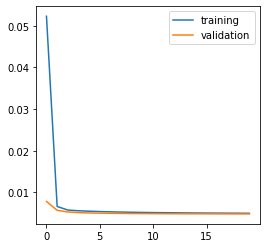

In [103]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.plot(loss_log["training"], label="training")
axes.plot(loss_log["validation"], label="validation")
plt.legend()

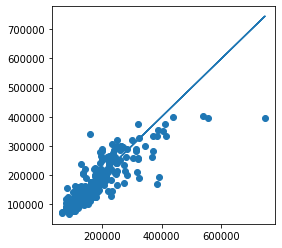

In [104]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.scatter(np.exp(y_test*(y_max - y_min) + y_min), np.exp(y_pred*(y_max - y_min) + y_min), label='predicted');
axes.plot(np.exp(y_test*(y_max - y_min) + y_min), np.exp(y_test*(y_max - y_min) + y_min), label='actual');

## 【問題5】MNISTのモデルを作成
ニューラルネットワークのスクラッチで使用したMNISTを分類するモデルを作成してください。

3クラス以上の分類という点ではひとつ前のIrisと同様です。入力が画像であるという点で異なります。

スクラッチで実装したモデルの再現を目指してください。

In [1]:
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

#yをone-hot化
eye = np.eye(len(np.unique(y_train)))
y_train = eye[y_train]
y_test = eye[y_test]

Using TensorFlow backend.


In [2]:
#reshape
X_train = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1, X_test.shape[1]*X_test.shape[2])

In [3]:
#split into train, val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) 
print(X_val.shape) 

(48000, 784)
(12000, 784)


In [8]:
def mnist_net(x, n_input, n_hidden1, n_hidden2, n_classes):
    """
    3層ニューラルネットワーク
    """

    # 重みとバイアスの宣言
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }

    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] # tf.addと+は等価である
    
    return layer_output

In [16]:
import tensorflow as tf

#hyper parameters
learning_rate = 0.001
batch_size = 20
n_epochs = 10
n_hidden1 = 400
n_hidden2 = 200
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes= y_train.shape[1]

#計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

#trainのミニバッチイテレータ
mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

#network構造の読み込み

logits = mnist_net(x=X, n_input=n_input,
                     n_hidden1=n_hidden1, n_hidden2=n_hidden2, n_classes=n_classes)

#loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits)

#目的関数
loss_to_optimize  = tf.reduce_mean(cross_entropy)

#最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

#最適化
train_op = optimizer.minimize(loss_to_optimize)

#prediction(probability)
proba = tf.nn.softmax(logits)

#prediction(value)
pred = tf.argmax(proba, axis=1)

#正解true不正解false
correct_pred = tf.equal(tf.argmax(Y, axis=1), pred)

#Accuracy
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#variable初期化
init = tf.global_variables_initializer()

#計算グラフの実行
with tf.Session() as sess:
        sess.run(init)
        loss_log = {"training": [], "validation": []}
        for epoch in range(n_epochs):
                total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
                total_loss = 0
                total_acc = 0
                for i, (mini_x, mini_y) in enumerate(mini_batch_train):
                        sess.run(train_op, feed_dict={X:mini_x, Y:mini_y})
                        loss, acc = sess.run([loss_to_optimize, accuracy], feed_dict={X: mini_x, Y: mini_y})
                        total_loss += loss
                        total_acc += acc
                
                total_loss /= total_batch
                total_acc /= total_batch
                
                val_loss, val_acc = sess.run([loss_to_optimize, accuracy], feed_dict={X: X_val, Y: y_val})

                loss_log["training"].append(total_loss)
                loss_log["validation"].append(val_loss)
                print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}".format(epoch, loss, val_loss, acc, val_acc))
        test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
        print("test_acc : {:.3f}".format(test_acc))

Epoch 0, loss : 6961.4014, val_loss : 9005.8369, acc : 0.850, val_acc : 0.896
Epoch 1, loss : 0.0000, val_loss : 5739.1973, acc : 1.000, val_acc : 0.920
Epoch 2, loss : 0.0000, val_loss : 4735.3701, acc : 1.000, val_acc : 0.929
Epoch 3, loss : 0.0000, val_loss : 4002.5537, acc : 1.000, val_acc : 0.936
Epoch 4, loss : 0.0000, val_loss : 3925.8540, acc : 1.000, val_acc : 0.937
Epoch 5, loss : 0.0000, val_loss : 3537.3333, acc : 1.000, val_acc : 0.942
Epoch 6, loss : 0.0000, val_loss : 3274.8242, acc : 1.000, val_acc : 0.948
Epoch 7, loss : 0.0000, val_loss : 3340.9619, acc : 1.000, val_acc : 0.948
Epoch 8, loss : 0.0000, val_loss : 3250.4583, acc : 1.000, val_acc : 0.950
Epoch 9, loss : 0.0000, val_loss : 3113.4939, acc : 1.000, val_acc : 0.952
test_acc : 0.953


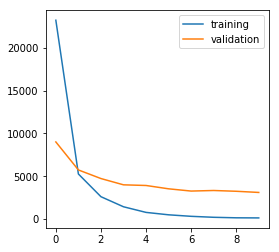

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.plot(loss_log["training"], label="training")
axes.plot(loss_log["validation"], label="validation")
plt.legend()